<a href="https://colab.research.google.com/github/annaelyoliveira/Projetos_com_biblioteca_Pandas/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Base de dados retirada do SISU https://sisu.mec.gov.br/#/selecionados

Base de dados escolhida https://sisu.mec.gov.br/static/pdf/282/portal/chamada_regular/1166/listagem-alunos-aprovados-ies-1166-10295.csv

Os Dados: listagem de alunos aprovados na chamada regular do SISU - IFPB 2025



In [ ]:
#Base de dados

df = pd.read_csv('https://sisu.mec.gov.br/static/pdf/282/portal/chamada_regular/1166/listagem-alunos-aprovados-ies-1166-10295.csv', on_bad_lines='skip', sep=';', encoding='latin1')

df.head()

,ï»¿CO_IES,NO_IES,SG_IES,SG_UF_IES,NO_CAMPUS,CO_IES_CURSO,NO_CURSO,DS_TURNO,DS_FORMACAO,QT_VAGAS_CONCORRENCIA,...,ST_BONUS_PERC,QT_BONUS_PERC,NO_ACAO_AFIRMATIVA_BONUS,NU_NOTA_CANDIDATO,NU_NOTACORTE_CONCORRIDA,NU_CLASSIFICACAO,ENSINO_MEDIO,QUILOMBOLA,DEFICIENTE,TIPO_CONCORRENCIA
0,1166,"INSTITUTO FEDERAL DE EDUCAÃÃO, CIÃNCIA E TE...",IFPB,PB,CAMPUS CAMPINA GRANDE,1695027,ENGENHARIA CIVIL,Integral,Bacharelado,13,...,NÃO,NaN,NaN,"533,66","514,23",5,S,N,N,LB_PPI
1,1166,"INSTITUTO FEDERAL DE EDUCAÃÃO, CIÃNCIA E TE...",IFPB,PB,CAMPUS CAMPINA GRANDE,1695027,ENGENHARIA CIVIL,Integral,Bacharelado,13,...,NÃO,NaN,NaN,"527,5","514,23",7,S,N,N,LB_PPI
2,1166,"INSTITUTO FEDERAL DE EDUCAÃÃO, CIÃNCIA E TE...",IFPB,PB,CAMPUS CAMPINA GRANDE,1695027,ENGENHARIA CIVIL,Integral,Bacharelado,13,...,NÃO,NaN,NaN,"516,58","514,23",11,S,N,N,LB_PPI
3,1166,"INSTITUTO FEDERAL DE EDUCAÃÃO, CIÃNCIA E TE...",IFPB,PB,CAMPUS CAMPINA GRANDE,1695027,ENGENHARIA CIVIL,Integral,Bacharelado,13,...,NÃO,NaN,NaN,"521,69","514,23",10,S,N,N,LB_PPI
4,1166,"INSTITUTO FEDERAL DE EDUCAÃÃO, CIÃNCIA E TE...",IFPB,PB,CAMPUS CAMPINA GRANDE,1695027,ENGENHARIA CIVIL,Integral,Bacharelado,13,...,NÃO,NaN,NaN,"540,19","514,23",4,S,N,N,LB_PPI


Extrair os dados dos alunos do IFPB campus Monteiro

In [ ]:
alunos_monteiro = df[df['NO_CAMPUS'].str.contains('CAMPUS MONTEIRO', case=False, na=False)]

alunos_monteiro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1355 to 2714
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ï»¿CO_IES                   160 non-null    int64  
 1   NO_IES                      160 non-null    object 
 2   SG_IES                      160 non-null    object 
 3   SG_UF_IES                   160 non-null    object 
 4   NO_CAMPUS                   160 non-null    object 
 5   CO_IES_CURSO                160 non-null    int64  
 6   NO_CURSO                    160 non-null    object 
 7   DS_TURNO                    160 non-null    object 
 8   DS_FORMACAO                 160 non-null    object 
 9   QT_VAGAS_CONCORRENCIA       160 non-null    int64  
 10  CO_INSCRICAO_ENEM           160 non-null    object 
 11  NO_INSCRITO                 160 non-null    object 
 12  NO_MODALIDADE_CONCORRENCIA  160 non-null    object 
 13  ST_BONUS_PERC               160 non-

Exclusão das colunas indesejadas

In [ ]:
alunos_monteiro = alunos_monteiro.drop(columns=['SG_UF_IES','DEFICIENTE','QUILOMBOLA','TIPO_CONCORRENCIA','ST_BONUS_PERC','SG_IES','NO_IES','CO_INSCRICAO_ENEM','ï»¿CO_IES', 'NO_IES', 'CO_IES_CURSO', 'QT_BONUS_PERC', 'DS_TURNO', 'NO_ACAO_AFIRMATIVA_BONUS'])

alunos_monteiro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1355 to 2714
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NO_CAMPUS                   160 non-null    object
 1   NO_CURSO                    160 non-null    object
 2   DS_FORMACAO                 160 non-null    object
 3   QT_VAGAS_CONCORRENCIA       160 non-null    int64 
 4   NO_INSCRITO                 160 non-null    object
 5   NO_MODALIDADE_CONCORRENCIA  160 non-null    object
 6   NU_NOTA_CANDIDATO           160 non-null    object
 7   NU_NOTACORTE_CONCORRIDA     160 non-null    object
 8   NU_CLASSIFICACAO            160 non-null    int64 
 9   ENSINO_MEDIO                160 non-null    object
dtypes: int64(2), object(8)
memory usage: 13.8+ KB


Extração dos alunos de ADS

In [ ]:
alunos_monteiro_ads = alunos_monteiro[alunos_monteiro['NO_CURSO'].str.contains('ANÃLISE E DESENVOLVIMENTO DE SISTEMAS', case=False, na=False)]

alunos_monteiro_ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 1355 to 1434
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NO_CAMPUS                   80 non-null     object
 1   NO_CURSO                    80 non-null     object
 2   DS_FORMACAO                 80 non-null     object
 3   QT_VAGAS_CONCORRENCIA       80 non-null     int64 
 4   NO_INSCRITO                 80 non-null     object
 5   NO_MODALIDADE_CONCORRENCIA  80 non-null     object
 6   NU_NOTA_CANDIDATO           80 non-null     object
 7   NU_NOTACORTE_CONCORRIDA     80 non-null     object
 8   NU_CLASSIFICACAO            80 non-null     int64 
 9   ENSINO_MEDIO                80 non-null     object
dtypes: int64(2), object(8)
memory usage: 6.9+ KB


 Renomeando as colunas.

In [ ]:
novos_nomes = {

    'NO_CAMPUS': 'CAMPUS',
    'NO_CURSO': 'CURSO',
    'DS_FORMACAO': 'FORMAÇÃO',
    'QT_VAGAS_CONCORRENCIA': 'QT_VAGAS_CONCORRENCIA',
    'NO_INSCRITO': 'INSCRITO',
    'NO_MODALIDADE_CONCORRENCIA': 'MODALIDADE_CONCORRENCIA',
    'NU_NOTA_CANDIDATO': 'NOTA',
    'NU_NOTACORTE_CONCORRIDA': 'NOTACORTE_CONCORRIDA',
    'NU_CLASSIFICACAO': 'CLASSIFICACAO',
    'ENSINO_MEDIO': 'ENSINO_MEDIO',
    }
alunos_monteiro_ads.rename(columns=novos_nomes, inplace=True)

print(alunos_monteiro_ads)

               CAMPUS                                   CURSO      FORMAÇÃO  \
1355  CAMPUS MONTEIRO  ANÃLISE E DESENVOLVIMENTO DE SISTEMAS  TecnolÃ³gico   
1356  CAMPUS MONTEIRO  ANÃLISE E DESENVOLVIMENTO DE SISTEMAS  TecnolÃ³gico   
1357  CAMPUS MONTEIRO  ANÃLISE E DESENVOLVIMENTO DE SISTEMAS  TecnolÃ³gico   
1358  CAMPUS MONTEIRO  ANÃLISE E DESENVOLVIMENTO DE SISTEMAS  TecnolÃ³gico   
1359  CAMPUS MONTEIRO  ANÃLISE E DESENVOLVIMENTO DE SISTEMAS  TecnolÃ³gico   
...               ...                                     ...           ...   
1430  CAMPUS MONTEIRO  ANÃLISE E DESENVOLVIMENTO DE SISTEMAS  TecnolÃ³gico   
1431  CAMPUS MONTEIRO  ANÃLISE E DESENVOLVIMENTO DE SISTEMAS  TecnolÃ³gico   
1432  CAMPUS MONTEIRO  ANÃLISE E DESENVOLVIMENTO DE SISTEMAS  TecnolÃ³gico   
1433  CAMPUS MONTEIRO  ANÃLISE E DESENVOLVIMENTO DE SISTEMAS  TecnolÃ³gico   
1434  CAMPUS MONTEIRO  ANÃLISE E DESENVOLVIMENTO DE SISTEMAS  TecnolÃ³gico   

      QT_VAGAS_CONCORRENCIA                        

<ipython-input-7-8f9767076121>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_monteiro_ads.rename(columns=novos_nomes, inplace=True)


Renomeando as Linhas corretamente

In [ ]:
alunos_monteiro_ads['CURSO'] = alunos_monteiro_ads['CURSO'].replace('ANÃ\x81LISE E DESENVOLVIMENTO DE SISTEMAS', 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS')
alunos_monteiro_ads['FORMAÇÃO'] = alunos_monteiro_ads['FORMAÇÃO'].replace('TecnolÃ³gico', 'TECNOLÓGICO')
alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'] = alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'].replace('Ampla concorrÃªncia', 'Ampla Concorrência')
alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'] = alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'].replace('com deficiÃªncia', 'Com deficiência')
alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'] = alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'].replace('Candidatos que, independentemente da renda, tenham cursado integralmente o ensino mÃ©dio em escolas pÃºblicas ou em escolas comunitÃ¡rias que atuam no Ã¢mbito da educaÃ§Ã£o do campo conveniadas com o poder pÃºblico (Lei nÂº 12.711/2012).', 'Independente da renda com EM em escolas públicas')
alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'] = alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'].replace('Candidatos autodeclarados pretos, pardos ou indÃ­genas, com renda familiar bruta per capita igual ou inferior a 1 salÃ¡rio mÃ­nimo e que tenham cursado integralmente o ensino mÃ©dio em escolas pÃºblicas ou em escolas comunitÃ¡rias que atuam no Ã¢mbito da educaÃ§Ã£o do campo conveniadas com o poder pÃºblico (Lei nÂº 12.711/2012).', 'Autodeclarados pretos, pardos ou indíenas, com renda familiar inferior a 1 salário mínimo, com EM em escolas públicas')
alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'] = alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'].replace('Candidatos autodeclarados pretos, pardos ou indÃ­genas, independentemente da renda, que tenham cursado integralmente o ensino mÃ©dio em escolas pÃºblicas ou em escolas comunitÃ¡rias que atuam no Ã¢mbito da educaÃ§Ã£o do campo conveniadas com o poder pÃºblico (Lei nÂº 12.711/2012).', 'Autodeclarados pretos, pardos ou indíenas, independente da renda, com EM em escolas públicas')
alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'] = alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'].replace('Candidatos autodeclarados quilombolas, com renda familiar bruta per capita igual ou inferior a 1 salÃ¡rio mÃ­nimo e que tenham cursado integralmente o ensino mÃ©dio em escolas pÃºblicas ou em escolas comunitÃ¡rias que atuam no Ã¢mbito da educaÃ§Ã£o do campo conveniadas com o poder pÃºblico (Lei nÂº 12.711/2012).', 'Autodeclarados quilombolas, com renda familiar inferior a 1 salário mínimo, com EM em escolas públicas')
alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'] = alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'].replace('Candidatos com deficiÃªncia, que tenham renda familiar bruta per capita igual ou inferior a 1 salÃ¡rio mÃ­nimo e que tenham cursado integralmente o ensino mÃ©dio em escolas pÃºblicas ou em escolas comunitÃ¡rias que atuam no Ã¢mbito da educaÃ§Ã£o do campo conveniadas com o poder pÃºblico (Lei nÂº 12.711/2012)', 'Com deficiência, com renda familiar inferior a 1 salário mínimo, com EM em escolas públicas')
alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'] = alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'].replace('Candidatos com deficiÃªncia, independentemente da renda, que tenham cursado integralmente o ensino mÃ©dio em escolas pÃºblicas ou em escolas comunitÃ¡rias que atuam no Ã¢mbito da educaÃ§Ã£o do campo conveniadas com o poder pÃºblico (Lei nÂº 12.711/2012).', 'Com deficiência, independentemente da renda, com EM em escolas públicas')
alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'] = alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'].replace('Candidatos com renda familiar bruta per capita igual ou inferior a 1 salÃ¡rio mÃ­nimo que tenham cursado integralmente o ensino mÃ©dio em escolas pÃºblicas ou em escolas comunitÃ¡rias que atuam no Ã¢mbito da educaÃ§Ã£o do campo conveniadas com o poder pÃºblico (Lei nÂº 12.711/2012).', 'Com renda familiar inferior a 1 salário mínimo, com EM em escolas públicas')
alunos_monteiro_ads['INSCRITO'] = alunos_monteiro_ads['INSCRITO'].replace('Ãtalo Henrique Pereira Mendes ', 'Ítalo Henrique Pereira Mendes')
alunos_monteiro_ads['INSCRITO'] = alunos_monteiro_ads['INSCRITO'].str.upper()

print(alunos_monteiro_ads)

               CAMPUS                                  CURSO     FORMAÇÃO  \
1355  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1356  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1357  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1358  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1359  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
...               ...                                    ...          ...   
1430  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1431  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1432  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1433  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1434  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   

      QT_VAGAS_CONCORRENCIA                                   INSCRITO  \
1

<ipython-input-8-1b4a29b95066>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_monteiro_ads['CURSO'] = alunos_monteiro_ads['CURSO'].replace('ANÃ\x81LISE E DESENVOLVIMENTO DE SISTEMAS', 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS')
<ipython-input-8-1b4a29b95066>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_monteiro_ads['FORMAÇÃO'] = alunos_monteiro_ads['FORMAÇÃO'].replace('TecnolÃ³gico', 'TECNOLÓGICO')
<ipython-input-8-1b4a29b95066>:3: SettingWithCopyWarning: 
A value is trying to be set on a c

Ordenando a lista da maior nota para a menor

In [ ]:
alunos_monteiro_ads = alunos_monteiro_ads.sort_values(by='NOTA', ascending=False)

alunos_monteiro_ads.head()

,CAMPUS,CURSO,FORMAÇÃO,QT_VAGAS_CONCORRENCIA,INSCRITO,MODALIDADE_CONCORRENCIA,NOTA,NOTACORTE_CONCORRIDA,CLASSIFICACAO,ENSINO_MEDIO
1402,CAMPUS MONTEIRO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,TECNOLÓGICO,38,PEDRO VICTOR FERNANDES COSTA,Ampla Concorrência,"709,8","621,72",1,S
1408,CAMPUS MONTEIRO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,TECNOLÓGICO,38,ARTHUR ALVES ANASTACIO,Ampla Concorrência,"709,24","621,72",2,S
1421,CAMPUS MONTEIRO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,TECNOLÓGICO,38,JOAO CARLOS JANSEN FILHO,Ampla Concorrência,"708,4","621,72",3,N
1409,CAMPUS MONTEIRO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,TECNOLÓGICO,38,ARTHUR MACIEL PIRES DE ARAUJO,Ampla Concorrência,"693,94","621,72",4,N
1426,CAMPUS MONTEIRO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,TECNOLÓGICO,38,PEDRO LUCAS DE SIQUEIRA SANTOS,Ampla Concorrência,"693,27","621,72",5,S


In [ ]:
colunas_ordenadas = ['CAMPUS','CURSO','FORMAÇÃO','INSCRITO','NOTA','NOTACORTE_CONCORRIDA','CLASSIFICACAO','QT_VAGAS_CONCORRENCIA','MODALIDADE_CONCORRENCIA','ENSINO_MEDIO']

alunos_monteiro_ads = alunos_monteiro_ads[colunas_ordenadas]

print(alunos_monteiro_ads)

               CAMPUS                                  CURSO     FORMAÇÃO  \
1402  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1408  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1421  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1409  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1426  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
...               ...                                    ...          ...   
1362  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1395  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1384  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1385  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   
1383  CAMPUS MONTEIRO  ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  TECNOLÓGICO   

                                INSCRITO    NOTA NOTACORTE_CONCORRIDA  \
14

Identificando a modalidade com a maior nota e apresentando o nome do inscrito, a nota e a nota de corte da modalidade


In [ ]:
# Encontrando modalidade com maior nota
modalidade_com_maior_nota = alunos_monteiro_ads.loc[alunos_monteiro_ads['NOTA'] == alunos_monteiro_ads['NOTA'].max()]

# Pegando os dados do candidato com a maior nota
nome_inscrito = modalidade_com_maior_nota['INSCRITO'].iloc[0]
nota_inscrito = modalidade_com_maior_nota['NOTA'].iloc[0]
nota_corte = modalidade_com_maior_nota['NOTACORTE_CONCORRIDA'].iloc[0]

print(f'A modalidade com a maior nota é: {modalidade_com_maior_nota["MODALIDADE_CONCORRENCIA"].iloc[0]}')
print(f'O nome do inscrito é: {nome_inscrito}')
print(f'A nota do inscrito é: {nota_inscrito}')
print(f'A nota de corte da modalidade é: {nota_corte}')

print('\n---------------------------------------------\n')
# Encontrando modalidade com menor nota
modalidade_com_maior_nota = alunos_monteiro_ads.loc[alunos_monteiro_ads['NOTA'] == alunos_monteiro_ads['NOTA'].min()]

# Pegando os dados do candidato com a maior nota
nome_inscrito = modalidade_com_maior_nota['INSCRITO'].iloc[0]
nota_inscrito = modalidade_com_maior_nota['NOTA'].iloc[0]
nota_corte = modalidade_com_maior_nota['NOTACORTE_CONCORRIDA'].iloc[0]

print(f'A modalidade com a menor nota é: {modalidade_com_maior_nota["MODALIDADE_CONCORRENCIA"].iloc[0]}')
print(f'O nome do inscrito é: {nome_inscrito}')
print(f'A nota do inscrito é: {nota_inscrito}')
print(f'A nota de corte da modalidade é: {nota_corte}')

A modalidade com a maior nota é: Ampla Concorrência
O nome do inscrito é: PEDRO VICTOR FERNANDES COSTA
A nota do inscrito é: 709,8
A nota de corte da modalidade é: 621,72

---------------------------------------------

A modalidade com a menor nota é: Com deficiência, com renda familiar inferior a 1 salário mínimo, com EM em escolas públicas
O nome do inscrito é: AILLA LAYSE DAS NEVES BARBOSA
A nota do inscrito é: 402,01
A nota de corte da modalidade é: 402,01


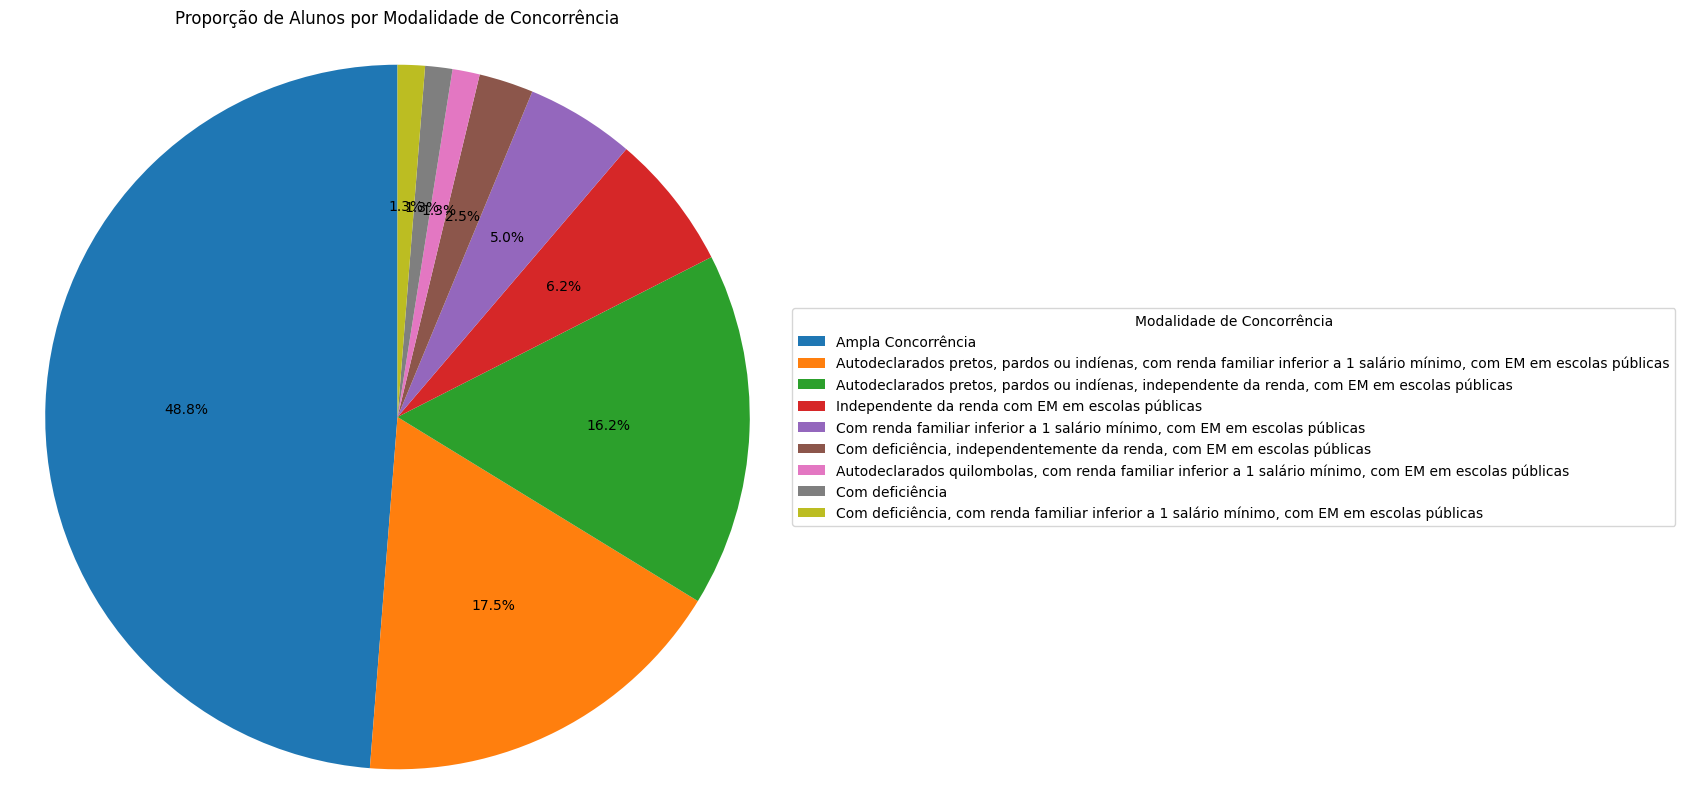

In [ ]:
# Supondo que modalidade_concorrencia seja um Series
modalidade_concorrencia = alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'].value_counts()

# Criar área de plotagem com tamanho maior
fig1, ax1 = plt.subplots(figsize=(10, 10))  # Ajustar tamanho da figura

# Criando o gráfico de pizza sem rótulos diretos
wedges, texts, autotexts = ax1.pie(
    modalidade_concorrencia,
    autopct='%1.1f%%',
    startangle=90
)

# Garantir que o gráfico de pizza seja circular
ax1.axis('equal')

# Adicionando a legenda separada
ax1.legend(
    wedges,
    modalidade_concorrencia.index,
    title="Modalidade de Concorrência",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)  # Posiciona a legenda ao lado do gráfico
)

# Adicionando título
plt.title('Proporção de Alunos por Modalidade de Concorrência')

# Exibindo o gráfico
plt.show()

In [ ]:
# Substituir vírgula por ponto e converter para float
alunos_monteiro_ads['NOTA'] = alunos_monteiro_ads['NOTA'].str.replace(',', '.').astype(float)

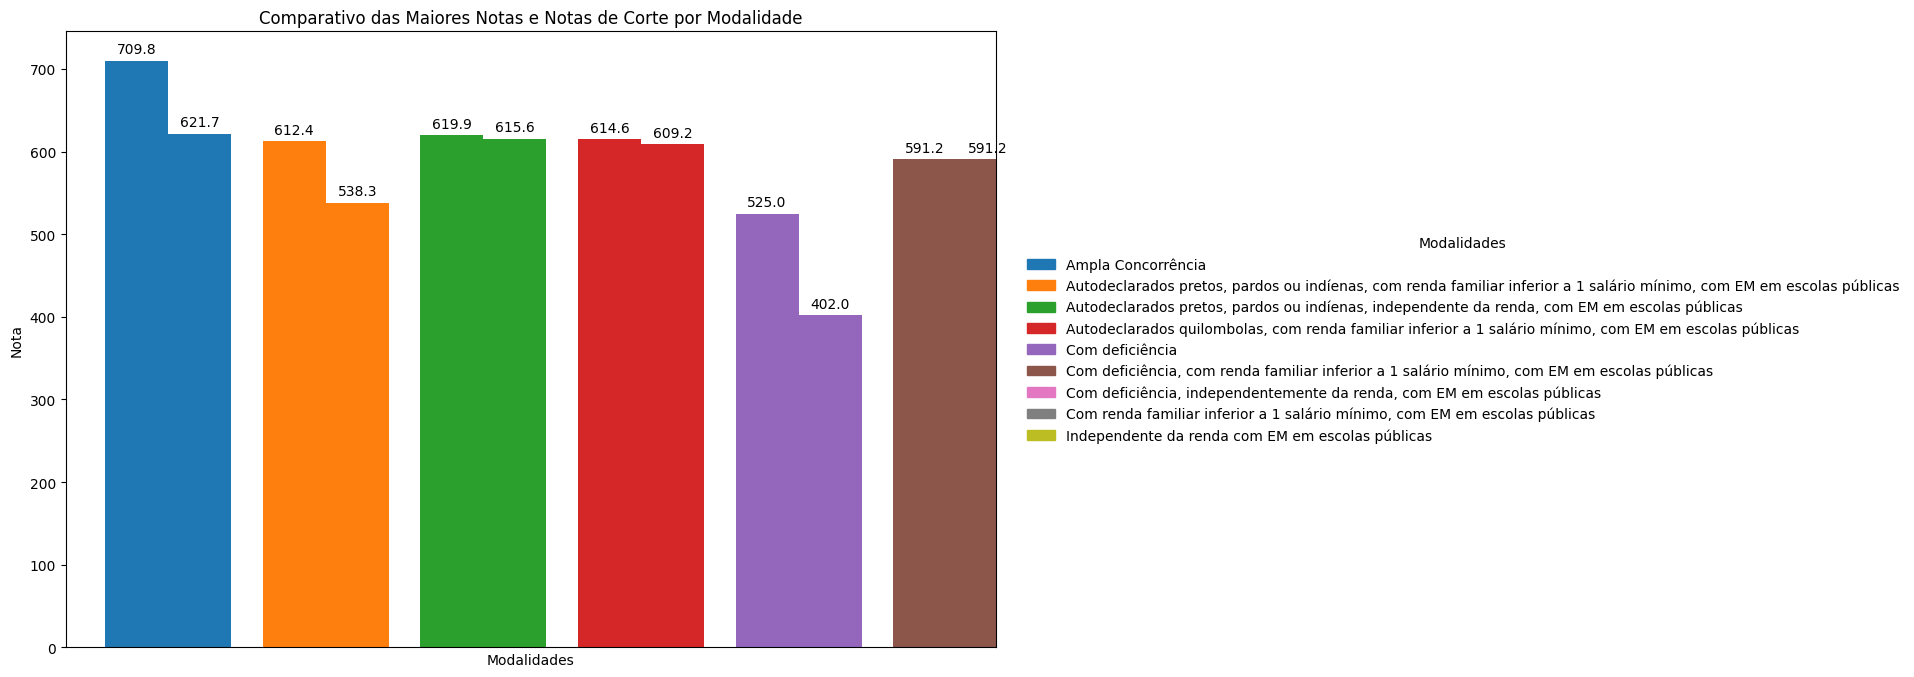

In [ ]:
#Calculando a maior e a menor nota por modalidade
notas_por_modalidade = alunos_monteiro_ads.groupby(['QT_VAGAS_CONCORRENCIA'])['NOTA'].agg(['min', 'max'])
# Definindo as cores para cada modalidade
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

notas_por_modalidade = notas_por_modalidade.sort_index(ascending=False)
# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))  # Ajusta o tamanho da figura
notas_por_modalidade['min'].plot(kind='bar', ax=ax, width=0.4, color=cores, position=0)
notas_por_modalidade['max'].plot(kind='bar', ax=ax, width=0.4, color=cores, position=1)


#Adicionando rótulos de valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

# Adicionar legenda vertical para modalidades (cores)
handles = [plt.Rectangle((0, 0), 1, 1, color=cores[i]) for i in range(len(modalidades))]
plt.legend(
    handles,
    modalidades,
    title="Modalidades",
    loc="center left",  # Posiciona a legenda à esquerda
    bbox_to_anchor=(1.02, 0.5),  # Desloca a legenda para a direita do gráfico
    ncol=1,  # Ajusta para uma única coluna (itens empilhados verticalmente)
    frameon=False  # Remove o fundo da legenda para um design mais limpo
)
#Ajustando título e rótulos dos eixos
plt.title('Comparativo das Maiores Notas e Notas de Corte por Modalidade')
plt.xlabel('Modalidades')
plt.ylabel('Nota')

#Rotacionando os rótulos do eixo X para melhor leitura
plt.xticks(rotation= 0)
plt.xticks([])

plt.show()

In [ ]:
alunos_monteiro_ads.to_excel("alunos_monteiro_ADS_sisu2025.xlsx", index = False)

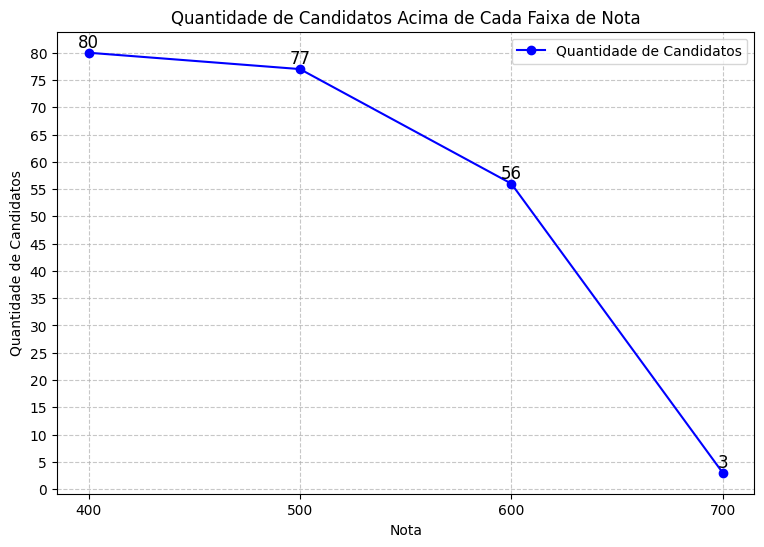

In [ ]:
# Definindo os limites de nota
limites_nota = [400, 500, 600, 700]

# Contando o número de candidatos acima de cada limite
quantidades = [alunos_monteiro_ads[alunos_monteiro_ads['NOTA'] > nota].shape[0] for nota in limites_nota]

# Criando o gráfico de linha
plt.figure(figsize=(9, 6))
plt.plot(limites_nota, quantidades, marker='o', linestyle='-', color='b', label="Quantidade de Candidatos")

# Adicionando os valores nos pontos do gráfico
for i, txt in enumerate(quantidades):
    plt.text(limites_nota[i], quantidades[i] + 1, str(txt), fontsize=12, ha='center', color='black')

# Personalizando o gráfico
plt.xlabel("Nota")
plt.ylabel("Quantidade de Candidatos")
plt.title("Quantidade de Candidatos Acima de Cada Faixa de Nota")
plt.xticks(limites_nota)  # Definindo os valores do eixo x
plt.yticks(range(0, max(quantidades) + 5, 5))  # Ajuste da escala do eixo y
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()


plt.show()

Agrupando valores com groupby para saber a quantidade de vagas por modalidade

In [ ]:
vagas_por_modalidade = alunos_monteiro_ads.groupby('MODALIDADE_CONCORRENCIA')['QT_VAGAS_CONCORRENCIA'].first()

print(vagas_por_modalidade)

MODALIDADE_CONCORRENCIA
Ampla Concorrência                                                                                                       38
Autodeclarados pretos, pardos ou indíenas, com renda familiar inferior a 1 salário mínimo, com EM em escolas públicas    13
Autodeclarados pretos, pardos ou indíenas, independente da renda, com EM em escolas públicas                             13
Autodeclarados quilombolas, com renda familiar inferior a 1 salário mínimo, com EM em escolas públicas                    1
Com deficiência                                                                                                           2
Com deficiência, com renda familiar inferior a 1 salário mínimo, com EM em escolas públicas                               2
Com deficiência, independentemente da renda, com EM em escolas públicas                                                   2
Com renda familiar inferior a 1 salário mínimo, com EM em escolas públicas                                  

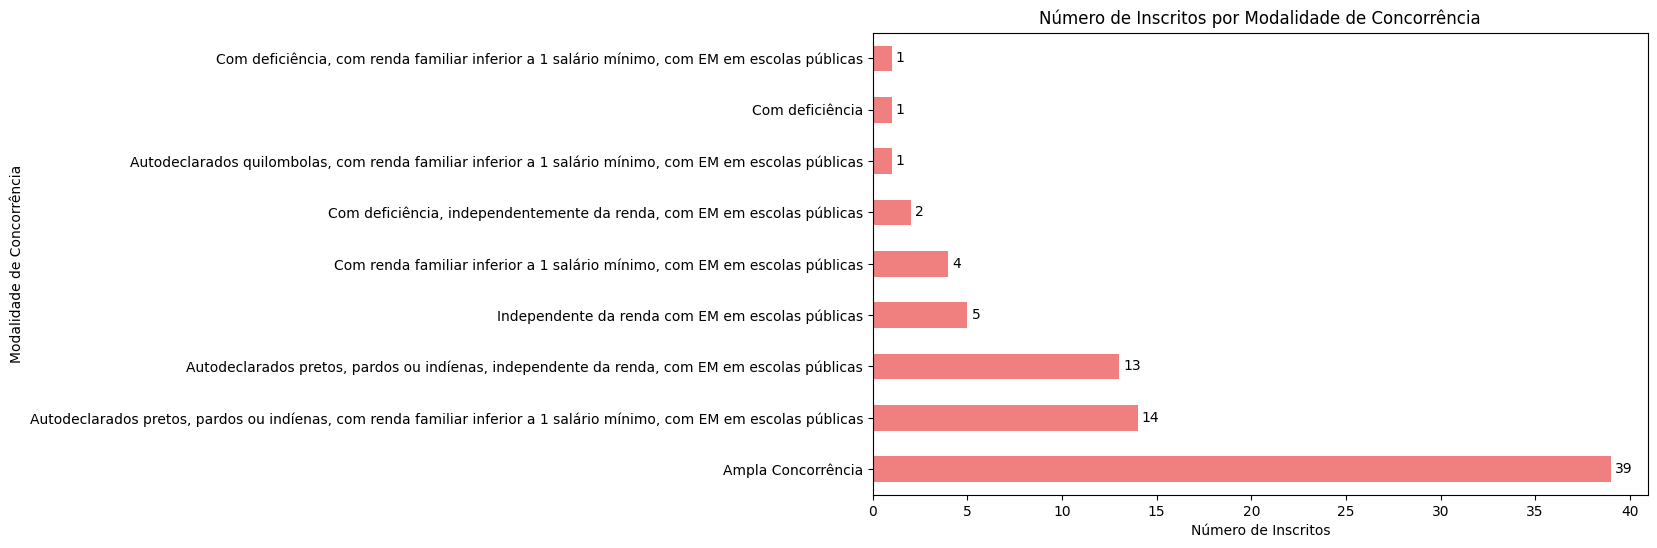

In [ ]:
inscritos_por_modalidade = alunos_monteiro_ads['MODALIDADE_CONCORRENCIA'].value_counts()
plt.figure(figsize=(10, 6))
ax = inscritos_por_modalidade.plot(kind='barh', color='lightcoral')
# Adicionando os números nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.title('Número de Inscritos por Modalidade de Concorrência')
plt.xlabel('Número de Inscritos')
plt.ylabel('Modalidade de Concorrência')

plt.show()